In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(context='notebook')
import matplotlib.pyplot as plt

In [84]:
#wczytanie do ramki danych
df = pd.read_excel(r"C:\Users\Michau\Desktop\Licencjat dane\Emigracja - analiza.xlsx",sheet_name="Obliczenia")

In [85]:
#sprawdzenie zmiennych i typów danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Rok                                                      20 non-null     int64  
 1   Średnia stopa bezrobocia PL %                            20 non-null     float64
 2   Przeciętne miesięczne wynagrodzenie w PL  (zł)           20 non-null     int64  
 3   Przeciętne wynagrodzenie w DE  (euro)                    20 non-null     int64  
 4   Przeciętne wynagrodzenie w DE w zł  (przeliczone)        20 non-null     float64
 5   Średni kurs euro (EUR) względem polskiego złotego (PLN)  20 non-null     float64
 6   Poczucie biedy DE                                        14 non-null     float64
 7   Opodatkowanie pracy DE                                   20 non-null     float64
 8   Różnica w zarobkach miesięcznych

In [86]:
#opis podstawowych parametrów rozkładów zmiennych
df.describe()

,Rok,Średnia stopa bezrobocia PL %,Przeciętne miesięczne wynagrodzenie w PL (zł),Przeciętne wynagrodzenie w DE (euro),Przeciętne wynagrodzenie w DE w zł (przeliczone),Średni kurs euro (EUR) względem polskiego złotego (PLN),Poczucie biedy DE,Opodatkowanie pracy DE,Różnica w zarobkach miesięcznych (PLN),Migracja na pobyt stały - Niemcy,Inflacja - Niemcy,Realny wzrost PKB Niemcy,Migracja na pobyt stały - USA,Realny wzrost PKB USA,Opodatkowanie pracy USA,Migracja na pobyt stały - UK,Realny wzrost PKB UK,Realny wzrost PKB Polska,Poczucie biedy PL,Opodatkowanie pracy PL
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,14.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,14.000000,20.000000
mean,2013.50000,10.525000,3976.000000,3531.000000,14.946289,4.210030,0.238714,0.455450,-10970.288950,7475.550000,2.161000,1.227150,1600.100000,2.145700,0.279800,4497.050000,1.424550,3.825850,0.238714,0.347650
std,5.91608,4.368894,1333.362982,476.731194,2.765697,0.278508,0.080744,0.010359,1524.060182,4384.997671,1.996428,2.440169,1107.165841,1.899913,0.015133,3950.194952,3.644177,2.326931,0.080744,0.016822
min,2004.00000,5.200000,2290.000000,2850.000000,10.821480,3.490800,0.137000,0.437000,-13512.280000,0.000000,0.250000,-5.548000,0.000000,-2.576000,0.235000,0.000000,-10.297000,-2.020000,0.137000,0.316000
25%,2008.75000,6.075000,3060.000000,3130.000000,12.916499,4.095600,0.157750,0.450500,-12020.682750,3896.250000,1.032500,0.779500,675.250000,1.958000,0.275750,2542.750000,1.338250,2.909250,0.157750,0.335500
50%,2013.50000,10.750000,3715.000000,3490.000000,14.588559,4.251350,0.235000,0.453500,-10873.559000,7293.500000,1.775000,1.269000,1682.000000,2.518000,0.281500,3272.000000,2.072500,4.291500,0.235000,0.348500
75%,2018.25000,12.725000,4672.500000,3905.000000,16.693183,4.356825,0.317250,0.460500,-10095.491750,11992.250000,2.337500,2.756500,2461.250000,2.901750,0.290500,5316.250000,2.633000,5.264500,0.317250,0.350500
max,2023.00000,19.500000,7160.000000,4480.000000,20.235264,4.684500,0.346000,0.475000,-7881.480000,14950.000000,8.670000,4.147000,3951.000000,6.055000,0.295000,17996.000000,8.576000,7.062000,0.346000,0.379000


In [93]:
# Kolumny z brakującymi danymi
df.isnull().sum()[df.isnull().sum()>0]

Poczucie biedy DE    6
Poczucie biedy PL    6
dtype: int64

In [94]:
#Pozostawianie do obliczeń tylko zmiennych dotyczących PL i DE
df_de = df[['Rok',
            'Średnia stopa bezrobocia PL %',
            'Przeciętne wynagrodzenie w DE w zł  (przeliczone)',
            'Poczucie biedy DE', 'Opodatkowanie pracy DE',
            'Migracja na pobyt stały - Niemcy', 'Inflacja - Niemcy',
            'Realny wzrost PKB Niemcy','Realny wzrost PKB Polska', 'Poczucie biedy PL',
           'Opodatkowanie pracy PL'
           ]].copy()

In [95]:
#usunięcie zmiennych zawierających braki danych
df_de.drop(columns = ["Poczucie biedy PL","Poczucie biedy DE"],inplace=True)

<Axes: >

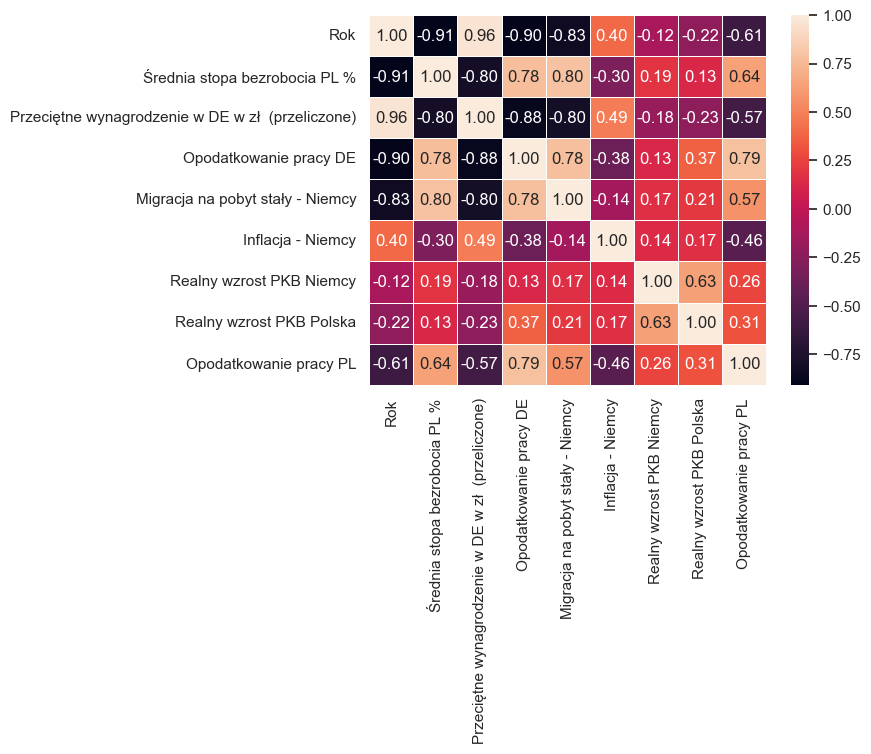

In [97]:
# Macierz korelacji
from pandas.plotting import scatter_matrix
correlation_matrix = df_de.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)

In [98]:
#Macierz odwrotna (obiekt array numpy)
correlation_matrix_inv =  np.linalg. inv(correlation_matrix)
# stworzenie ramki danych
correlation_matrix_inv_df = pd.DataFrame(correlation_matrix_inv,columns=[['Rok',
            'Średnia stopa bezrobocia PL %',
            'Przeciętne wynagrodzenie w DE w zł  (przeliczone)', 'Opodatkowanie pracy DE',
            'Migracja na pobyt stały - Niemcy', 'Inflacja - Niemcy',
            'Realny wzrost PKB Niemcy','Realny wzrost PKB Polska',
           'Opodatkowanie pracy PL'
           ]],index = [['Rok',
            'Średnia stopa bezrobocia PL %',
            'Przeciętne wynagrodzenie w DE w zł  (przeliczone)', 'Opodatkowanie pracy DE',
            'Migracja na pobyt stały - Niemcy', 'Inflacja - Niemcy',
            'Realny wzrost PKB Niemcy','Realny wzrost PKB Polska',
           'Opodatkowanie pracy PL'
           ]] )

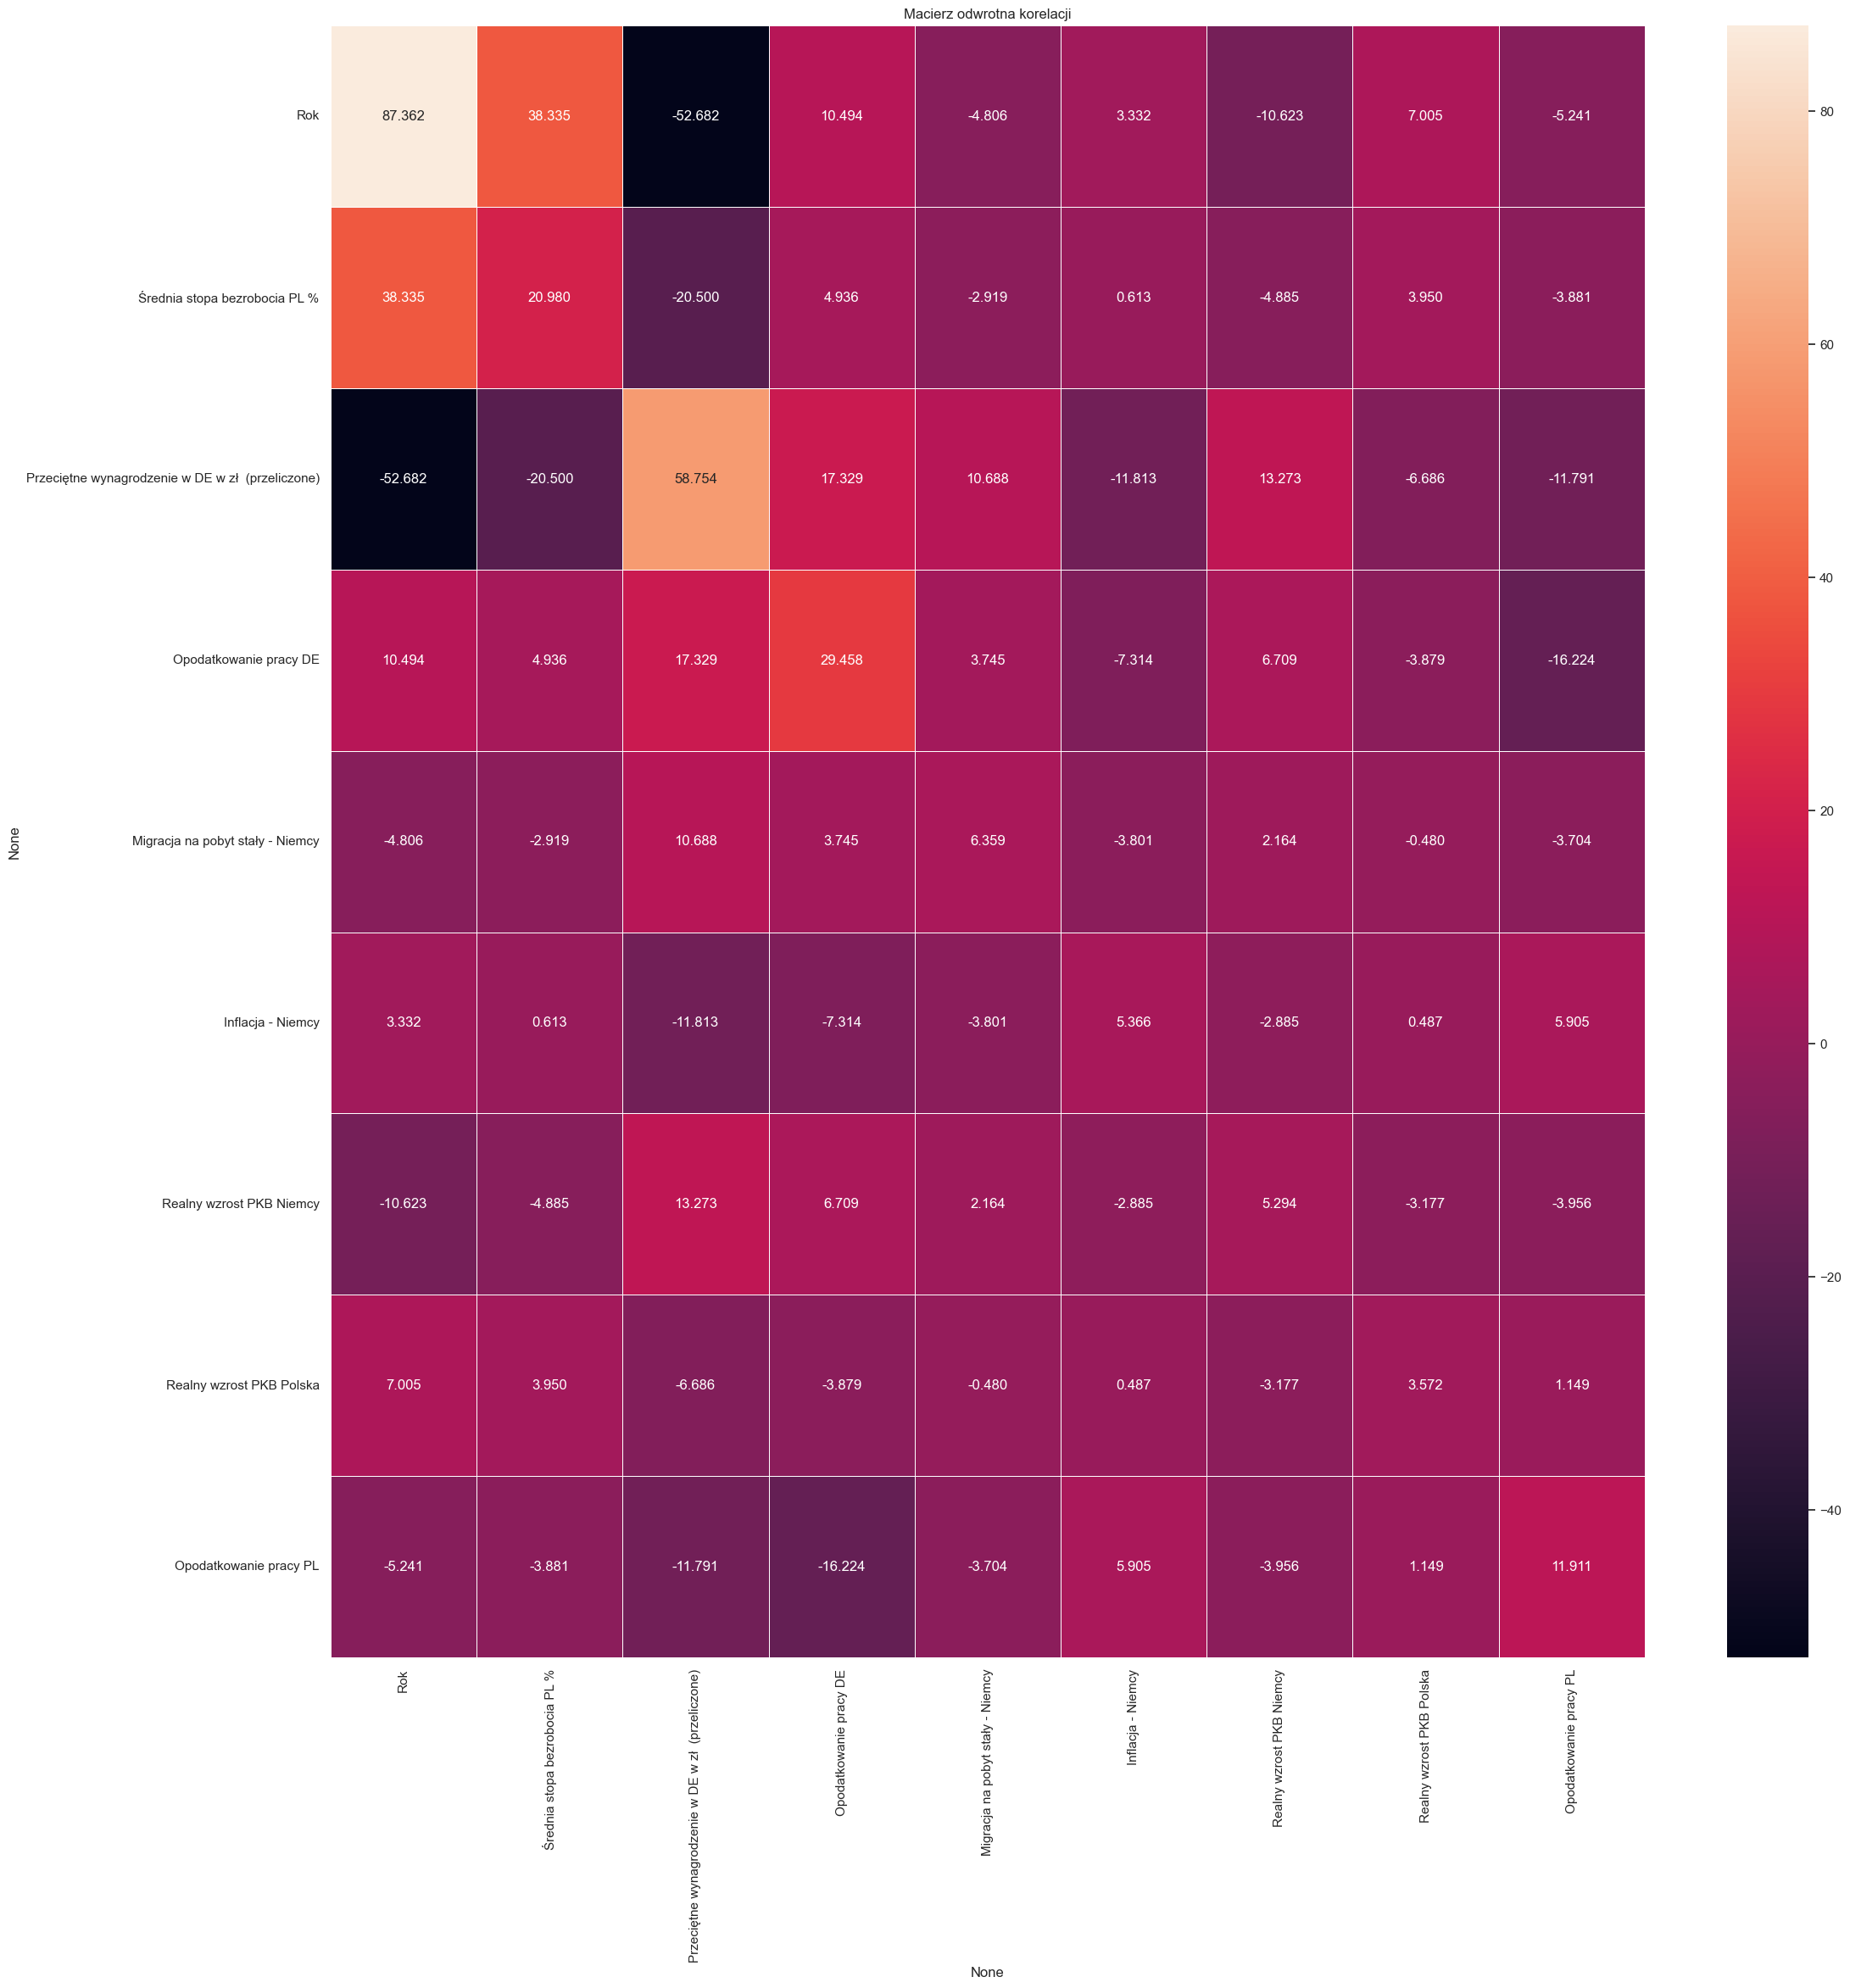

In [100]:
# Macierz korelacji
plt.figure(figsize=(25, 25))  # Ustawienie rozmiaru wykresu
sns.heatmap(correlation_matrix_inv_df, annot=True, fmt=".3f", linewidths=0.5)
plt.title("Macierz odwrotna korelacji")
# Zapisz wykres do pliku PNG
#plt.savefig("macierz_odwrotna_korelacji.png", dpi=300, bbox_inches="tight")
plt.show()

In [81]:
correlation_matrix_inv_df 

,Rok,Średnia stopa bezrobocia PL %,Przeciętne wynagrodzenie w DE w zł (przeliczone),Opodatkowanie pracy DE,Migracja na pobyt stały - Niemcy,Inflacja - Niemcy,Realny wzrost PKB Niemcy,Realny wzrost PKB Polska,Opodatkowanie pracy PL
Rok,87.361527,38.335308,-52.681784,10.493542,-4.806418,3.331616,-10.622659,7.005069,-5.241423
Średnia stopa bezrobocia PL %,38.335308,20.979702,-20.500179,4.935950,-2.919233,0.613062,-4.884731,3.949772,-3.881126
Przeciętne wynagrodzenie w DE w zł (przeliczone),-52.681784,-20.500179,58.754495,17.329310,10.688244,-11.812557,13.273397,-6.685767,-11.791280
Opodatkowanie pracy DE,10.493542,4.935950,17.329310,29.458231,3.745183,-7.313535,6.708868,-3.878950,-16.224257
Migracja na pobyt stały - Niemcy,-4.806418,-2.919233,10.688244,3.745183,6.359420,-3.801301,2.163850,-0.480336,-3.704096
Inflacja - Niemcy,3.331616,0.613062,-11.812557,-7.313535,-3.801301,5.365529,-2.885320,0.487325,5.905472
Realny wzrost PKB Niemcy,-10.622659,-4.884731,13.273397,6.708868,2.163850,-2.885320,5.294123,-3.176725,-3.956292
Realny wzrost PKB Polska,7.005069,3.949772,-6.685767,-3.878950,-0.480336,0.487325,-3.176725,3.571840,1.149488
Opodatkowanie pracy PL,-5.241423,-3.881126,-11.791280,-16.224257,-3.704096,5.905472,-3.956292,1.149488,11.911042


In [101]:
#Model regresji liniowej

import statsmodels.api as sm

# Rozdzielenie zmiennych objaśniających (X) i objaśnianej (Y)
X = df_de.drop('Migracja na pobyt stały - Niemcy', axis=1)  # Usunięcie kolumny celu z X
Y = df_de['Migracja na pobyt stały - Niemcy']  # Kolumna celu (Y)

# Dodanie wyrazu wolnego (stałej)
X = sm.add_constant(X)

# Tworzenie i dopasowanie modelu regresji
model_sm = sm.OLS(Y, X).fit()

# Wyświetlenie wyników
print(model_sm.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Migracja na pobyt stały - Niemcy   R-squared:                       0.843
Model:                                          OLS   Adj. R-squared:                  0.728
Method:                               Least Squares   F-statistic:                     7.369
Date:                              Wed, 22 Jan 2025   Prob (F-statistic):            0.00172
Time:                                      17:07:14   Log-Likelihood:                -177.09
No. Observations:                                20   AIC:                             372.2
Df Residuals:                                    11   BIC:                             381.1
Df Model:                                         8                                         
Covariance Type:                          nonrobust                                         
                                                        coef    std er